## Importing Libraries and Dataset

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

if not os.path.isdir('models'): 
    os.mkdir('models')   

In [46]:
import tensorflow as tf
from keras.models import Sequential  #Sequential Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation  #Different layers of CNN
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [47]:
pip install emnist

In [48]:
#from emnist import list_datasets

In [49]:
#list_datasets()

In [50]:
from emnist import extract_training_samples 
X_train,y_train = extract_training_samples('byclass')

In [51]:
from emnist import extract_test_samples
X_test,y_test  = extract_test_samples('byclass')

In [52]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (697932, 28, 28)
y_train shape:  (697932,)
X_test shape:  (116323, 28, 28)
y_test shape:  (116323,)


In [53]:
#In Training Set there are 6,97,932 images of 28 by 28 pixels
#In test Set there are 1,16,323 images of 28 by 28 pixels

## Visualization

	  Label : 24


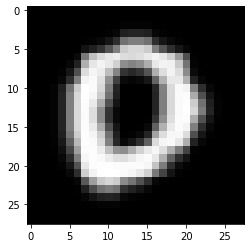

In [54]:
random_index = np.random.randint(0,697932)

print("\t  Label :",y_train[random_index]) 
plt.imshow(X_train[random_index], cmap='gray');

#by adding ; at the end you don't get that matplotlib line....<matplotlib.image.AxesImage at 0x7fa9f8b04a20>

	  Label : 28


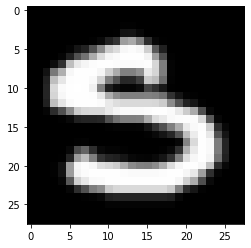

In [55]:
random_index = np.random.randint(0,697932)

print("\t  Label :",y_train[random_index]) 
plt.imshow(X_train[random_index], cmap='gray');

In [56]:
print("\t\t\tTABLE\n")
from IPython.display import Image
Image('/content/Images/Table.png')

			TABLE



In [57]:
classes = ['0','1','2','3','4','5','6','7','8','9',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
             'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

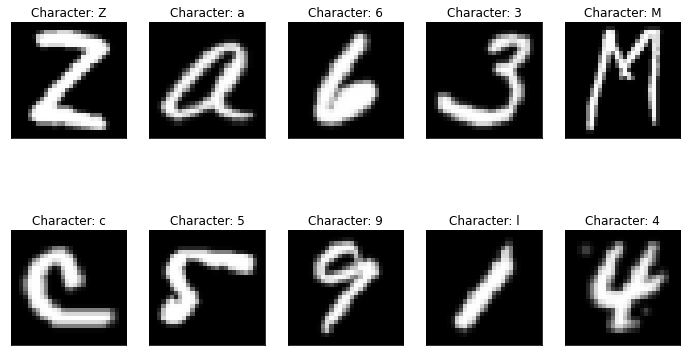

In [58]:
#Checking Training Examples
fig = plt.figure(figsize=(12,7))
for i in range(10):
  plt.subplot( 2, 5 , i+1)            # 2 rows 5 columns                                                                  
  plt.imshow(X_train[i], cmap='gray')  # prints image
  plt.yticks([])  #no x and y ticks
  plt.xticks([])
  index = y_train[i]
  plt.title("Character: " + str(classes[index]))      

## Reshaping and One Hot Encoding

In [59]:
#We need to reshape our 3D array to 4D array so it can be used with keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [60]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (697932, 28, 28, 1)
X_test shape:  (116323, 28, 28, 1)


In [61]:
X_train = X_train/255  #normalize inputs from 0-255 to 0-1
X_test = X_test/255

In [62]:
from keras.utils import to_categorical
#Keras expects "one hot" encoding in multiclass problems for the labels.

print("Shape of y_train:",y_train.shape)
y_train = to_categorical(y_train)   
print("New Shape of y_train:",y_train.shape)
print("\n")
print("Shape of y_test:",y_test.shape)
y_test = to_categorical(y_test)  
print("New Shape of y_test:",y_test.shape)

Shape of y_train: (697932,)
New Shape of y_train: (697932, 62)


Shape of y_test: (116323,)
New Shape of y_test: (116323, 62)


# **MODEL 0**

In [63]:
# Train loss :     0.26318340681853974
# Train accuracy : 0.8959081768989563
# Test loss :      0.34020779107309806
# Test accuracy :  0.8751665353775024

# DIFFERENCES::
# LOSS:      0.07703
# ACCURACY : 0.0207

In [64]:
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

In [65]:

from tensorflow.keras.callbacks import EarlyStopping

In [66]:
es= EarlyStopping(monitor='val_loss',mode='min',patience=2)

In [67]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=62, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history = model.fit(X_train, y_train, epochs=20, batch_size=1024, verbose=1, \
                    validation_data=(X_test, y_test),callbacks=[es])

Epoch 1/20
682/682 [==============================] - 32s 46ms/step - loss: 1.0454 - accuracy: 0.7057 - val_loss: 0.3981 - val_accuracy: 0.8560
Epoch 2/20
682/682 [==============================] - 31s 45ms/step - loss: 0.4391 - accuracy: 0.8467 - val_loss: 0.3678 - val_accuracy: 0.8644
Epoch 3/20
682/682 [==============================] - 31s 46ms/step - loss: 0.3987 - accuracy: 0.8560 - val_loss: 0.3576 - val_accuracy: 0.8664
Epoch 4/20
682/682 [==============================] - 32s 46ms/step - loss: 0.3759 - accuracy: 0.8625 - val_loss: 0.3479 - val_accuracy: 0.8704
Epoch 5/20
682/682 [==============================] - 32s 47ms/step - loss: 0.3620 - accuracy: 0.8662 - val_loss: 0.3415 - val_accuracy: 0.8722
Epoch 6/20
682/682 [==============================] - 32s 47ms/step - loss: 0.3508 - accuracy: 0.8696 - val_loss: 0.3382 - val_accuracy: 0.8729
Epoch 7/20
682/682 [==============================] - 32s 47ms/step - loss: 0.3416 - accuracy: 0.8723 - val_loss: 0.3374 - val_accuracy:

In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print ('Test loss :', loss )
print ('Test accuracy :', accuracy )

Test loss : 0.33474043011665344
Test accuracy : 0.8756909370422363


In [70]:
loss1, accuracy1 = model.evaluate(X_train, y_train, verbose=0)
print ('Train loss :', loss1 )
print ('Train accuracy :', accuracy1 )

Train loss : 0.26454177498817444
Train accuracy : 0.8960858583450317


Text(0, 0.5, 'Accuracy')

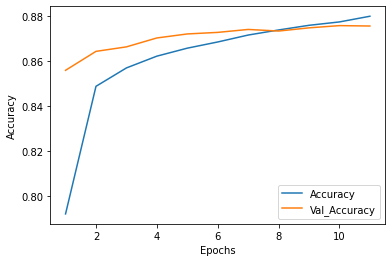

In [71]:
import seaborn as sns
s = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+s),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

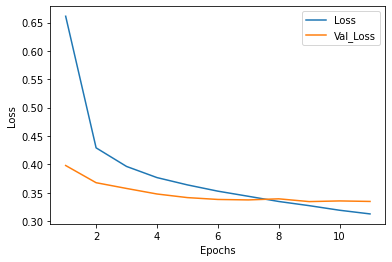

In [72]:
s = len(history.history['loss'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+s),y = history.history['loss'], label='Loss')
sns.lineplot(x = range(1,1+s),y = history.history['val_loss'], label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [73]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

### **Predictions**

Predicted Label : 3
Actual Label:3


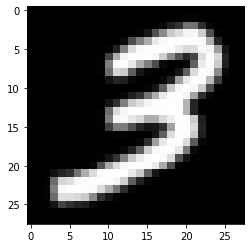

In [74]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label:"+ classes[index])

Predicted Label : a
Actual Label:a


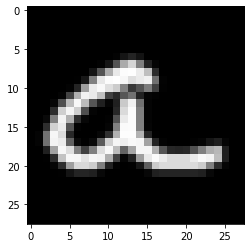

In [75]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label:"+ classes[index])

Predicted Label : 8
Actual Label:8


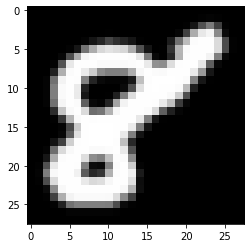

In [76]:
random_index = np.random.randint(0,116323)
plt.imshow(X_test[random_index].reshape(28, 28),cmap='gray')
predictions = model.predict(X_test[random_index].reshape(1, 28, 28, 1))
index1 =predictions.argmax()
print("Predicted Label : "+classes[index1])
index = y_test[random_index].argmax()
print("Actual Label:"+ classes[index])

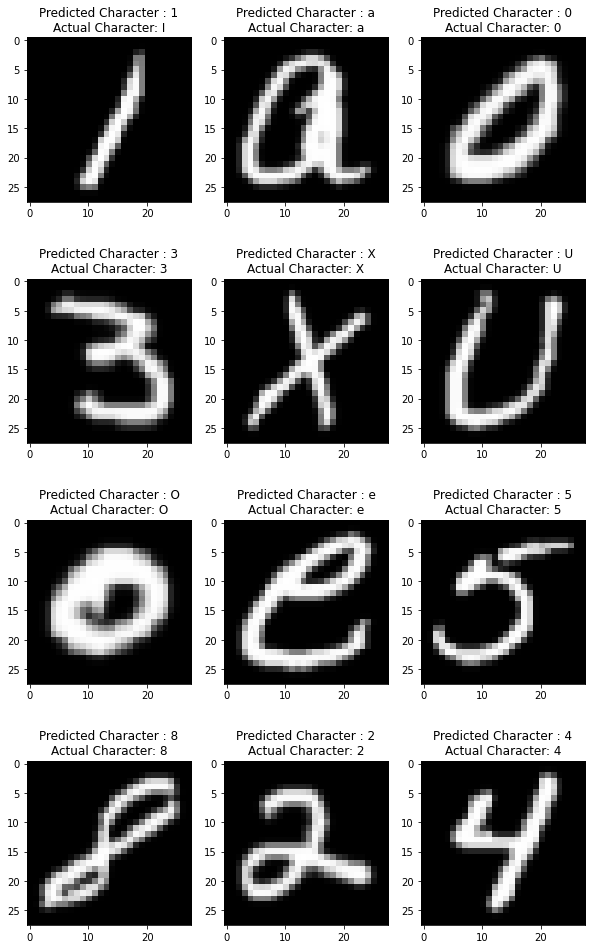

In [77]:
fig = plt.figure(figsize=(10,17))
for i in range(12):
  plt.subplot(4 , 3 , i+1)            # 2 rows 5 columns                                                                  
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')  # prints image
  predictions = model.predict(X_test[i].reshape(1, 28, 28, 1))
  index1 =predictions.argmax()
  index2 = y_test[i].argmax()
  plt.title("Predicted Character : "+classes[index1]
            +"\n"+"Actual Character: "+ classes[index2])
  
